In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Modules.SQcircuit_extensions as sq_ext
import Modules.Fits as fits
from scipy.optimize import minimize
import os
import importlib
import pickle

importlib.reload(sq_ext)
importlib.reload(fits)

data_dir = r'/data'
opt_dir = r'/opt_results/'

<Figure size 640x480 with 0 Axes>

In [2]:
GHz     =   1e9
fF      =   1e-15
nH      =   1e-9
nmax_r  =   5
nmax_f  =   10

# Single circuit

## Qubit 1 [ Cooldown 1 ]

In [23]:
experiment_name = 'qubit_1_single_1'
load = True
method = 'SLSQP'
# method = 'Nelder-Mead'
# method = 'L-BF GS-B'
# method = 'TNC'
# method = 'Powell'
# method = 'COBYLA'


### Load spectral data and theoretical model

In [24]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [25]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [26]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters(experiment_name)
I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

In [27]:
I0_guess

In [28]:
I_origin_guess

In [29]:
I_exp

### Plot guess to check

In [30]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_exp, 'x')
ax1.plot(φ_ext_guess, ω_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


### Optimize or load previous optimization

In [37]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [38]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [39]:
φ_ext_opt, ω_opt   = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp  , ω_exp     , 'x')
ax1.plot(φ_ext_guess, ω_guess   , 'r.', markersize=4, label='Guess')
ax1.plot(φ_ext_opt  , ω_opt     , 'g.', markersize=4, label='Optimized')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax1.set_title('Spectrum')
ax1.legend()
ax2.set_title('Error')

ax2.plot(φ_ext_guess, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

## Resonator 1 [ Cooldown 1 ]

In [41]:
experiment_name = 'resonator_1_single_1'


### Load spectral data and theoretical model

In [18]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [19]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters(experiment_name)

crossing_index_1 = 11
crossing_index_2 = 10
nmax_r=5
nmax_f=15

data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, nmax_r, nmax_f ])
parameters_guess = [CR_1, LR_1, Δ_1, I0_guess, I_origin_guess]

parameter_names = ['CR_1', 'LR_1', 'Delta', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

In [20]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

### Optimize or load previous optimization

In [21]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [22]:
print('Guessed parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.4e}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [23]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_opt  , ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r', markersize=3)
ax1.plot(φ_ext_opt  , ω_opt, 'g.', markersize=3)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_guess - ω_exp), 'r.', label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_exp, np.abs(ω_opt   - ω_exp), 'g.', label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

 ## Qubit 1 and Resonator 1 [Cooldown 1]

In [43]:
experiment_name = 'resonator_and_qubit_1_single_1'


### Load spectral data and theoretical model

In [44]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [45]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [46]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']

crossing_index_1_F = 15
crossing_index_1_R = 11
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

In [47]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
fig.tight_layout()

### Optimize or load previous optimization

In [48]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [49]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [31]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.' , label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.' , label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.' , label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.' , label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3. legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.55e9,6.65e9])


## Qubit 1 and Resonator 1 [Cooldown 2]

In [295]:
experiment_name = 'resonator_and_qubit_1_single_2'


### Load spectral data and theoretical model

In [296]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F, φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = (
    fits.get_experimental_spectrum(experiment_name))

In [297]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [298]:
CF_1, LF_1, EJ_1, _, _, CR_1, LR_1, Δ_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_and_qubit_1_single_1' + '.npz')['parameters_opt']

I0_F_1 = I0_F
I_origin_F_1 = Iss_F - I0_F/2

I0_R_1 = I0_R
I_origin_R_1 = Iss_R - I0_R/2

crossing_index_1_F = 30
crossing_index_1_R = 10
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, CR_1, LR_1, Δ_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'CR_1', 'LR_1', 'Δ_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

### Plot guess to check

In [299]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[12,4], dpi=200)
for ax in (ax1, ax2, ax3):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.5e9,6.7e9])
ax3.set_ylim([3.8e9, 6.4e9])
ax3.set_xlim([0.3,0.7])
#ax.set_ylabel(r'$')
#ax.set_xlabel(r'$')
#ax.set_title(r'$')
fig.tight_layout()

### Optimize or load previous optimization

In [300]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [301]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [302]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
    
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.5e9,6.7e9])
ax3.legend()

# Qubit 1

In [3]:
experiment_name = 'qubit_1'
load = True


### Load spectral data and theoretical model

In [4]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [5]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters(experiment_name)
CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)
# CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)

I0_guess = I0
I_origin_guess = Iss - I0/2

parameters_guess = [CF_1, LF_1, EJ_1, I0_guess, I_origin_guess]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

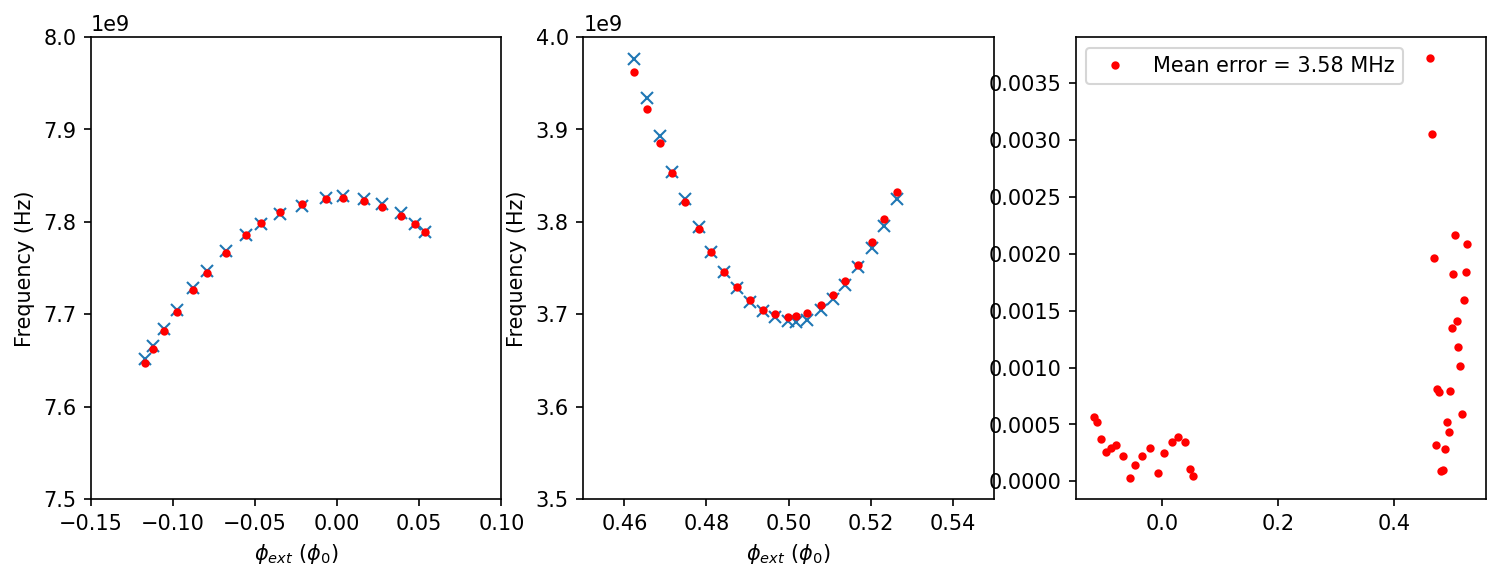

In [6]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2, ax3) = plt.subplots(dpi=150, ncols=3, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_guess, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([7.5e9,8e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.5e9,4e9])
ax2.set_xlim([0.45,0.55])

ax3.plot(φ_ext_guess, np.abs(ω_guess-ω_exp)/ω_exp, 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.legend()

## Optimize or load previous optimization

In [7]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead', tol=1e-12).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [8]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_1 = 32.150
LF_1 = 22.060
EJ_1 = 6.190
I0 = 0.003
I_origin = -0.002


Optimized parameters 

CF_1 = 31.587
LF_1 = 22.462
EJ_1 = 6.105
I0 = 0.003
I_origin = -0.002


## Plot fits and errors

In [43]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.6e9, 7.9e9])
ax1.set_xlim([-0.15,0.1])
ax2.set_ylim([3.6e9, 4.1e9])
ax2.set_xlim([0.45, 0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax3.legend()

# Resonator 1 

In [313]:
experiment_name = 'resonator_1'

### Load spectral data and theoretical model

In [314]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [315]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [316]:
CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CR_1, _, _, LR_1, _, Δ_1, _ = sq_ext.get_experimental_parameters(experiment_name)

In [321]:
CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)


In [327]:
CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)


In [328]:
C_int_11 = 500
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 13
crossing_index_2  = 10
LR_1, CR_1 = sq_ext.ωR_to_LR_CR(6.495, LR=LR_1)

parameter_names = ['C_int_11', 'CR_1', 'LR_1', 'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int_11, CR_1, LR_1 ,I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_1, LF_1, EJ_1, Δ_1,  nmax_r, nmax_f ])
bounds = fits.create_bounds(parameters_guess)

In [329]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [330]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [331]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
error_guess = theoretical_spectrum(parameters_guess, data_set, out='error');
print(f'Error = {error_guess}')
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];
error_opt = theoretical_spectrum(parameters_opt, data_set, out='error');
print(f'Error = {error_opt}')

## Plot fits and errors

In [351]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 1 and Resonator 1

In [352]:
experiment_name = 'resonator_and_qubit_1'


### Load spectral data and theoretical model

In [353]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_1')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_1')

In [354]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [355]:
CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, LR_1, I0_R_1, I_origin_R_1 = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_R = 13
crossing_index_2_R = 10
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_1, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_1, LF_1, EJ_1, I0_F_1, I_origin_F_1, C_int_11, CR_1, LR_1, I0_R_1, I_origin_R_1]

parameter_names = ['CF_1', 'LF_1', 'EJ_1', 'I0_F_1', 'I_origin_F_1',
                   'C_int_11', 'CR_1', 'LR_1', 'I0_R_1', 'I_origin_R_1']

bounds = fits.create_bounds(parameters_guess)

In [356]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.35e9,6.6e9])
fig.tight_layout()

### Optimize or load previous optimization

In [357]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [358]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [359]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.35e9,6.6e9])


# Qubit 2

In [9]:
experiment_name = 'qubit_2'
load=True


### Load spectral data and theoretical model

In [10]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [11]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [12]:
CR_2, CF_2, LF_2, LR_2, EJ_2, Δ_2, ω_r_2 = sq_ext.get_experimental_parameters('qubit_2')
CF_2,LF_2,EJ_2  = (22.445216684751557, 20.435030944899754, 9.496913786496863)
I0_guess = I0
I_origin_guess = Iss - I0/2

parameters_guess = [CF_2, LF_2, EJ_2, I0_guess, I_origin_guess]

parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

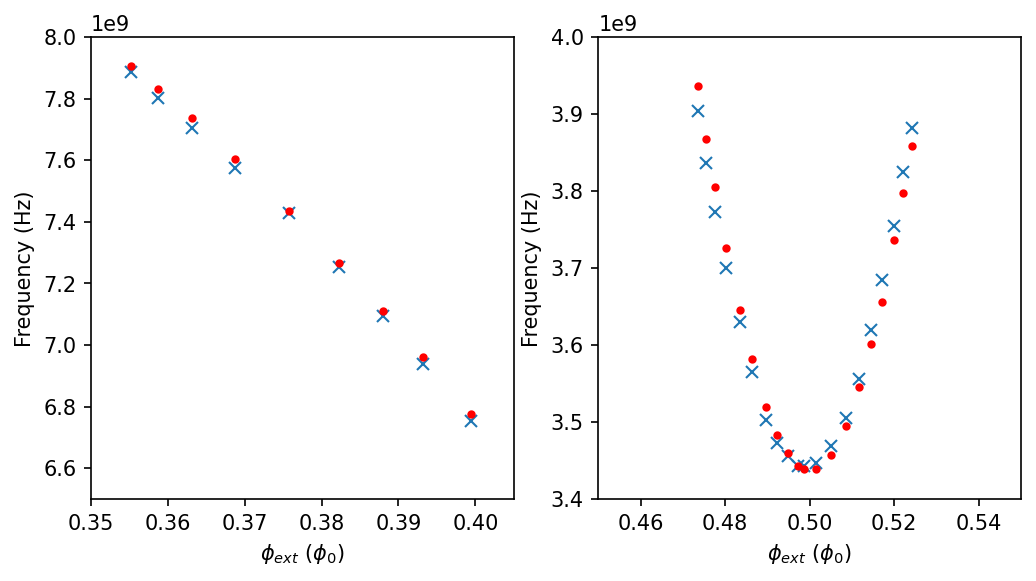

In [13]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_guess, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([6.5e9,8e9])
ax1.set_xlim([0.35,0.405])
ax2.set_ylim([3.4e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [14]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [15]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Guessed parameters 

CF_2 = 22.445
LF_2 = 20.435
EJ_2 = 9.497
I0 = 0.005
I_origin = -0.005


Optimized parameters 

CF_2 = 22.197
LF_2 = 20.603
EJ_2 = 9.465
I0 = 0.005
I_origin = -0.005


## Plot fits and errors

In [54]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_opt, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([6.5e9,8e9])
ax1.set_xlim([0.35,0.405])
ax2.set_ylim([3.4e9,4e9])
ax2.set_xlim([0.45,0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_guess, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_opt, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax3.legend()

# Resonator 2

In [378]:
experiment_name = 'resonator_2'

## Load spectral data and theoretical model

In [379]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [380]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [381]:
CF_2, LF_2, EJ_2, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, _, _, LR_2, _, Δ_2, _ = sq_ext.get_experimental_parameters(experiment_name)

I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 11
crossing_index_2  = 9

nmax_r = 15
nmax_f = 25 
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_2, LF_2, EJ_2, nmax_r, nmax_f ])
parameters_guess = [CR_2, LR_2, Δ_2, I0_guess, I_origin_guess]
parameter_names = ['CR_2', 'LR_2', 'Delta', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

In [382]:
fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
#ax.set_ylim([6.2875e9, 6.2925e9])
#ax.set_xlim([0.45, 0.55])
fig.tight_layout()

## Optimize or load previous optimization

In [383]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [384]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

## Plot fits and errors

In [385]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 2 and Resonator 2

In [386]:
experiment_name = 'resonator_and_qubit_2'


### Load spectral data and theoretical model

In [387]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_2')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_2')

In [388]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [389]:
CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, LR_2, Δ_2, I0_R_2, I_origin_R_2 = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']

crossing_index_1_F = 20
crossing_index_1_R = 11
crossing_index_2_R = 9
nmax_r = 5
nmax_f = 15

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_2, LF_2, EJ_2, I0_F_2, I_origin_F_2, CR_2, LR_2, Δ_2,  I0_R_2, I_origin_R_2]
parameter_names = ['CF_2', 'LF_2', 'EJ_2', 'I0_F_2', 'I_origin_F_2',
                   'CR_2', 'LR_2', 'Δ_2', 'I0_R_2', 'I_origin_R_2']
bounds = fits.create_bounds(parameters_guess)

In [390]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([6.26e9,6.28e9])
fig.tight_layout()

### Optimize or load previous optimization

In [391]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [392]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [395]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([6.265e9,6.28e9])



# Qubit 3

In [16]:
experiment_name = 'qubit_3'
load = True


### Load spectral data and theoretical model

In [17]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [18]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [19]:
CR_3, CF_3, LF_3, LR_3, EJ_3, Δ_3, ω_r_3 = sq_ext.get_experimental_parameters(experiment_name)
CF_3, LF_3, EJ_3

(25.2, 31.6, 5.6)

In [20]:
CF_3, LF_3, EJ_3 = (26.469686661169657, 30.0, 5.780487830155092)

In [21]:
I0_guess = I0
I_origin_guess = Iss - I0/2
parameters_guess = [CF_3, LF_3, EJ_3, I0_guess, I_origin_guess]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0', 'I_origin']
bounds = fits.create_bounds(parameters_guess)
data_set = ([I_exp, ω_exp])

(0.45, 0.55)

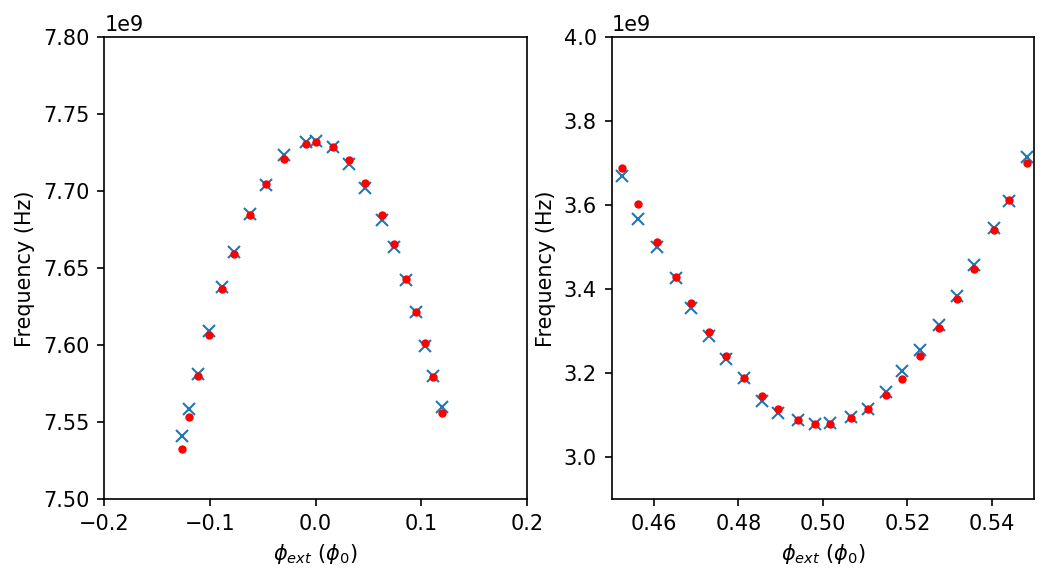

In [22]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=150, ncols=2, figsize=[8,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_guess, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')
ax1.set_ylim([7.5e9,7.8e9])
ax1.set_xlim([-0.2,0.2])
ax2.set_ylim([2.9e9,4e9])
ax2.set_xlim([0.45,0.55])

## Optimize or load previous optimization

In [201]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='SLSQP').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [202]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

## Plot fits and errors

In [197]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt  , data_set,  out = 'spectrum')

fig, (ax1, ax2, ax3 )= plt.subplots(ncols=3, dpi=200, figsize=[4*3,4])
for ax in (ax1, ax2):
    ax.plot(φ_ext_opt, ω_exp, 'x')
    ax.plot(φ_ext_guess, ω_guess, 'r.', markersize=4)
    ax.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
    ax.set_title('Spectrum')
ax1.set_ylim([7.5e9,7.8e9])
ax1.set_xlim([-0.2,0.2])
ax2.set_ylim([2.9e9,4e9])
ax2.set_xlim([0.45,0.55])
ax3.set_title('Error')
ax3.plot(φ_ext_exp, np.abs(ω_guess-ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp, np.abs(ω_opt-ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax3.legend()

# Resonator 3

In [286]:
experiment_name = 'resonator_3'
load = False

### Load spectral data and theoretical model

In [279]:
φ_ext_exp, ω_exp, I_exp, I0, Iss = fits.get_experimental_spectrum(experiment_name)

In [280]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [302]:
CF_3, LF_3, EJ_3, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
CR_3, _, _, LR_3, _, Δ_3, ω_r_3 = sq_ext.get_experimental_parameters(experiment_name)
# Δ_3 +=0.4
C_int_33 = -500
I0_guess = I0
I_origin_guess = Iss - I0/2
crossing_index_1  = 10
crossing_index_2  = 8

parameter_names = ['C_int_33', 'CR_3', 'LR_3', 'I0_guess', 'I_origin_guess' ]

parameters_guess = [C_int_33, CR_3, LR_3 ,I0_guess, I_origin_guess ]
data_set = ([I_exp, ω_exp, crossing_index_1, crossing_index_2, CF_3, LF_3, EJ_3, Δ_3,  nmax_r, nmax_f ])
bounds= fits.create_bounds(parameters_guess)

In [303]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_guess, ω_exp, marker='x', ls='')
ax.plot(φ_ext_guess, ω_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
fig.tight_layout()

Okay, so, here we have a bit of trouble. The problem is that according to the Delta estimated geometrically this splitting is already too small. If on top of that we add repulsion by a capacitive coupling then the splitting can only be bigger. I would need the single circuit spectra to be able to extract Delta from that, and then come to this one and get the capacitive interaction.

## Optimize or load previous optimization

In [287]:
if load:
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method = method).x
    np.savez(os.getcwd() + opt_dir + experiment_name + '.npz', parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [288]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

## Plot fits and errors

In [289]:
φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_guess, ω_guess, '.r')
ax1.plot(φ_ext_opt, ω_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_guess, np.abs(ω_guess - ω_exp), 'r.' , label = f'Mean error = {np.abs(ω_guess-ω_exp).mean()/1e6:.2f} MHz' )
ax2.plot(φ_ext_opt, np.abs(ω_opt   - ω_exp), 'g.'   , label = f'Mean error = {np.abs(ω_opt-ω_exp).mean()/1e6:.2f} MHz'  )
ax2.legend()

# Qubit 3 and Resonator 3

In [273]:
experiment_name = 'resonator_and_qubit_3'


### Load spectral data and theoretical model

In [274]:
φ_ext_exp_F, ω_exp_F, I_exp_F, I0_F, Iss_F = fits.get_experimental_spectrum('qubit_3')
φ_ext_exp_R, ω_exp_R, I_exp_R, I0_R, Iss_R = fits.get_experimental_spectrum('resonator_3')

In [275]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

### Guess parameters and set bounds

In [276]:
CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, LR_3, I0_R_3, I_origin_R_3 = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']

crossing_index_1_F = 22
crossing_index_1_F = 24
crossing_index_1_R = 10
crossing_index_2_R = 8
nmax_r = 5
nmax_f = 15
# C_int = 500

data_set = ([I_exp_F, ω_exp_F, I_exp_R, ω_exp_R, Δ_3, crossing_index_1_F, crossing_index_1_R, crossing_index_2_R, nmax_r, nmax_f])
parameters_guess = [CF_3, LF_3, EJ_3, I0_F_3, I_origin_F_3, C_int_33, CR_3, LR_3, I0_R_3, I_origin_R_3]

parameter_names = ['CF_3', 'LF_3', 'EJ_3', 'I0_F_3', 'I_origin_F_3',
                   'C_int_33', 'CR_3', 'LR_3', 'I0_R_3', 'I_origin_R_3']

bounds = ((20,30), (20,30), (4,15), (I0_F_3*0.9, I0_F_3*1.1), (I_origin_F_3*1.1, I_origin_F_3*0.9),
          (10, 1000), (2,25), (30,170), (I0_R_3*0.9, I0_R_3*1.1), (I_origin_R_3*1.1, I_origin_R_3*0.9))

In [277]:
φ_ext_F_guess, ωF_vs_φ_ext_guess, φ_ext_R_guess, ωR_vs_φ_ext_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[8,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F, ω_exp_F, 'x')
    ax.plot(φ_ext_exp_R, ω_exp_R, 'x')
    ax.plot(φ_ext_F_guess, ωF_vs_φ_ext_guess, '.r')
    ax.plot(φ_ext_R_guess, ωR_vs_φ_ext_guess, '.r')
    
ax2.set_ylim([5.175e9,5.25e9])
fig.tight_layout()

### Optimize or load previous optimization

In [289]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [290]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

### Plot fits and errors

In [291]:
φ_ext_F_opt, ωF_vs_φ_ext_opt, φ_ext_R_opt, ωR_vs_φ_ext_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[4*3,4], dpi=200)
for ax in (ax1, ax2):
    ax.plot(φ_ext_exp_F     , ω_exp_F   , 'x')
    ax.plot(φ_ext_exp_R     , ω_exp_R   , 'x')
    ax.plot(φ_ext_F_guess   , ωF_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_R_guess   , ωR_vs_φ_ext_guess , '.r')
    ax.plot(φ_ext_F_opt     , ωF_vs_φ_ext_opt   , '.g')
    ax.plot(φ_ext_R_opt     , ωR_vs_φ_ext_opt   , '.g')
    ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_guess - ω_exp_F), 'r.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_guess-ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_guess - ω_exp_R), 'r.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_guess-ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.plot(φ_ext_exp_F, np.abs(ωF_vs_φ_ext_opt   - ω_exp_F), 'g.', label = f'Mean error = {np.abs(ωF_vs_φ_ext_opt   - ω_exp_F).mean()/1e6:.2f} MHz' )
ax3.plot(φ_ext_exp_R, np.abs(ωR_vs_φ_ext_opt   - ω_exp_R), 'g.', label = f'Mean error = {np.abs(ωR_vs_φ_ext_opt   - ω_exp_R).mean()/1e6:.2f} MHz'  )
ax3.legend()
ax1.set_title('Frequency (Hz)')
ax2.set_title('Frequency (Hz)')
ax3.set_title('Error (Hz)')
ax2.set_ylim([5.175e9,5.25e9])


# Qubit 1 - Qubit 2 avoided crossing while Qubit 3 is off-resonant

In [77]:
experiment_name = 'qubit_1_qubit_2'


### Load spectral data and theoretical model

In [78]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)

In [79]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [145]:
CF_1, LF_1, EJ_1, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']

# Initial conditions 1
# CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)
# LF_1-=0.0275

# Initial conditions 2
CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)
LF_1-=0.0675

In [146]:
φ_ext_i = 0.517
φ_ext_f = 0.52
C_int_12 = 15000
nmax_f = 15

data_set = [CF_1, EJ_1, CF_2, LF_2, EJ_2, I_exp, ω_exp, nmax_f]
parameters_guess = [C_int_12, φ_ext_i, φ_ext_f, LF_1]
parameter_names =  ['C_int_12', 'φ_ext_i', 'φ_ext_f', 'LF_1']
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
bounds = fits.create_bounds(parameters_guess)

In [147]:
fig, ax = plt.subplots(dpi=150)

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'xb')
    ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.g')

## Optimize or load previous optimization

In [148]:
load = False
method = 'SLSQP'

In [149]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method='Nelder-Mead').x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

Optimization for initial conditions 2

In [150]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

Optimization for initial conditions 1

In [135]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

## Plot fits and errors

Optimization for initial conditions 2

In [151]:
φ_ext_opt, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
fig, (ax1, ax2) = plt.subplots(dpi=200, figsize = [8,3], ncols=2)

for i in range(len(ω_exp)):
    ax1.plot(φ_ext_opt[i], ω_exp[i]*1e9, 'x')
    ax1.plot(φ_ext_opt[i], ω_opt[i]*1e9, '.g')
ax1.set_ylabel('Energy')
ax1.set_xlabel(r'$\varphi_{ext,3}$')

for i in range(len(ω_exp)):
    ax2.plot(φ_ext_guess[i], np.abs(ω_guess[i]*1e9-ω_exp[i]*1e9), 'r.' , label = f'Mean error = {np.abs(ω_guess[i]*1e9-ω_exp[i]*1e9).mean()/1e6:.2f} MHz' )
    ax2.plot(φ_ext_opt[i], np.abs(ω_opt[i]*1e9-ω_exp[i]*1e9), 'g.'   , label = f'Mean error = {np.abs(ω_opt[i]*1e9-ω_exp[i]*1e9).mean()/1e6:.2f} MHz'  )
ax2.legend()
ax2.set_xlabel(r'$\varphi_{ext,3}$')

fig.tight_layout()

Optimization for initial conditions 1

# Qubit 1 - Qubit 2 - Qubit 3
Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In [218]:
experiment_name = 'qubit_1_qubit_2_qubit_3'
method = 'SlSQP'
load = False


### Load spectral data and theoretical model

In [211]:
ω_exp, I_exp = fits.get_experimental_spectrum(experiment_name)

In [212]:
theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)

## Guess parameters and set bounds

In [213]:
CF_1, LF_1, EJ_1, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
CF_2, LF_2, EJ_2, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CF_3, LF_3, EJ_3, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
LF_1-=0.065

In [304]:
#This set of qubit_3 propperties fits way better than the other we have
CF_3, LF_3, EJ_3 = (26.469686661169657, 30.0, 5.780487830155092)

In [205]:
# Initial conditions 1
CF_1, LF_1, EJ_1 = (25.46, 28.11, 5.18)
LF_1-=0.0275

# Initial conditions 2
# CF_1, LF_1, EJ_1 = (32.15, 22.06, 6.19)
# LF_1-=0.07

In [305]:
φ_ext_i = 5.47014884e-01
φ_ext_f = 5.49545749e-01

C_int_12 = 15099.771
C_int_23 = 13140.112
C_int_13 = 200000.000

nmax_f = 8

data_set = [I_exp, ω_exp, φ_ext_i, φ_ext_f, nmax_f]
parameters_guess = [C_int_12, C_int_23, C_int_13, LF_1, CF_1, EJ_1, CF_2, LF_2, EJ_2, CF_3, LF_3, EJ_3]
parameter_names =  ['C_int_12', 'C_int_23', 'C_int_13', 'LF_1', 'CF_1', 'EJ_1', 'CF_2', 'LF_2', 'EJ_2', 'CF_3', 'LF_3', 'EJ_3']
bounds = fits.create_bounds(parameters_guess)

In [306]:
φ_ext_guess, ω_guess = theoretical_spectrum(parameters_guess, data_set, out='spectrum')
fig, ax = plt.subplots(dpi=150)

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'x')
    ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.')

## Optimize or load previous optimization

In [219]:
data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
    parameters_opt, parameters_guess, bounds = fits.load_optimization_results(experiment_name)
else:
    with open(data_set_path, 'wb') as f:
        pickle.dump(data_set, f)
    parameters_opt = minimize(theoretical_spectrum, parameters_guess, data_set, bounds=bounds, method=method).x
    np.savez(parameters_path, parameters_opt=parameters_opt,
             parameters_guess = np.array(parameters_guess), bounds=np.array(bounds))

In [222]:
print('Guessed parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_guess)];
print('\n')
print('Optimized parameters \n')
[print(name + f' = {value:.3f}') for name, value in zip(parameter_names, parameters_opt)];

In [223]:
φ_ext_opo, ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')

In [224]:
fig, ax = plt.subplots(dpi=200, figsize = [4,3])

for i in range(len(ω_exp)):
    ax.plot(φ_ext_guess[i], ω_exp[i]*1e9, 'x')
    # ax.plot(φ_ext_guess[i], ω_guess[i]*1e9, '.r')
    ax.plot(φ_ext_opo[i], ω_opt[i]*1e9, '.g')
ax.set_ylabel('Energy')
ax.set_xlabel(r'$\varphi_{ext,3}$')

# Estimate circuit capacitances from fits

In [314]:
CF_1, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
C_int_11, CR_1, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
CF_2, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_2' + '.npz')['parameters_opt']
CR_2, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_2' + '.npz')['parameters_opt']
CF_3, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_3' + '.npz')['parameters_opt']
C_int_33, CR_3, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_3' + '.npz')['parameters_opt']
C_int_12, _, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2' + '.npz')['parameters_opt']
C_int_12, C_int_23, C_int_13 = np.load(os.getcwd() + opt_dir +  'qubit_1_qubit_2_qubit_3' + '.npz')['parameters_opt'] 

In [315]:
C_inv = np.array([[CF_1**-1     ,C_int_11**-1   ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_11**-1 ,CR_1**-1       ,C_int_12**-1   ,C_int_12**-1   ,C_int_13**-1   ,C_int_13**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,CF_2**-1       ,0              ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_12**-1 ,C_int_12**-1   ,0              ,CR_2**-1       ,C_int_23**-1   ,C_int_23**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,CF_3**-1       ,C_int_33**-1   ],
                  [C_int_13**-1 ,C_int_13**-1   ,C_int_23**-1   ,C_int_23**-1   ,C_int_33**-1   ,CR_3**-1       ]])

In [316]:
C_mat = np.linalg.inv(C_inv)

In [317]:
matrix = C_mat
max_len = 0
for row in matrix:
    for num in row:
        num_str = f"{num:.4g}"  # Using 4 significant digits for this example
        if len(num_str) > max_len:
            max_len = len(num_str)

# Print the matrix with the numbers properly aligned
for row in matrix:
    for num in row:
        print(f"{num:>{max_len}.4g}", end=' ')
    print()  # New line at the end of each row

In [318]:
CF_1_single, _, _, _, _= np.load(os.getcwd() + opt_dir +  'qubit_1_single_1' + '.npz')['parameters_opt']
CR_1_single, _, _, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1_single_1' + '.npz')['parameters_opt']
CF_1_single, CR_1_single

In [319]:
CF_1 - CF_1_single

In [320]:
CR_1 - CR_1_single

In [321]:
C_12 = -C_mat[0,2]*4
C_12

In [322]:
C_23 = -C_mat[2,4]*4
C_23

In [323]:
import sympy as sym

In [324]:
C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C = sym.symbols('C_F_1, C_F_2, C_F_3, C_R_1, C_R_2, C_R_3, C_C', real=True, positive=True, nonzero=True)

In [325]:
C_mat_sym = sym.Matrix([[C_F_1 + C_C/4  ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       , 0             , 0             ],
                        [-C_C / 4       , C_R_1 + C_C/4 ,-C_C / 4       ,-C_C / 4       , 0             ,0              ],
                        [-C_C / 4       ,-C_C / 4       , C_F_2 + C_C/2 , 0             ,-C_C / 4       ,-C_C / 4       ],
                        [-C_C / 4       ,-C_C / 4       , 0             , C_R_2 + C_C/2 ,-C_C / 4       ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,C_F_3 + C_C/4  ,-C_C / 4       ],
                        [0              ,0              ,-C_C / 4       ,-C_C / 4       ,-C_C / 4       ,C_R_3 + C_C/4  ]])

In [326]:
C_inv_sym = C_mat ** -1
sym.simplify(C_inv_sym)

In [326]:
def hamiltonian_qubit_C_qubit_C_qubit(coupling_capacitances, params_1='load', params_2='load', params_3='load', nmax_r=5, nmax_f=10):
    '''
    params_1, params_2 and params_3 can be either the string 'load', in which case the corresponding parameters for each circuit are loaded from those of the fits,
    or a list of parameters
    '''
    if params_1 == 'load':
        CF_1, LF_1, EJ_1, _, _ = np.load(os.getcwd() + opt_dir +  'qubit_1' + '.npz')['parameters_opt']
        C_int_11, CR_1, LR_1, _, _ = np.load(os.getcwd() + opt_dir +  'resonator_1' + '.npz')['parameters_opt']
    

# Full spectrum

In [330]:
experiment_names = ['qubit_1', 'resonator_1', 'qubit_2', 'resonator_2', 'qubit_3', 'resonator_3']

fig, ax = plt.subplots(dpi=250)

for experiment_name in experiment_names:
    _, ω_exp, _, _, _ = fits.get_experimental_spectrum(experiment_name)
    theoretical_spectrum = fits.get_theoretical_spectrum(experiment_name)
    parameters_path = os.getcwd() + opt_dir + experiment_name + '.npz'
    parameters_opt = np.load(parameters_path)['parameters_opt'] 
    data_set_path = os.path.join(os.getcwd() + opt_dir, experiment_name + '_data_set.pkl')
    with open(data_set_path, 'rb') as f:
        data_set = pickle.load(f)
        
    φ_ext_opt , ω_opt = theoretical_spectrum(parameters_opt, data_set, out='spectrum')
    ax.plot(φ_ext_opt, ω_exp, 'xb')
    ax.plot(φ_ext_opt, ω_opt, '.g', markersize=4)
   
fig.tight_layout()

In [ ]:
    elif experiment_name == 'qubit_1_qubit_2':
        def qubit_qubit_crossing_spectrum(parameters, data_set, out='error'):
            C_int, φ_ext_i, φ_ext_f, LF_1 = parameters
            CF_1, EJ_1, CF_2, LF_2, EJ_2, I_exp, ω_exp, indices_0, indices_1, nmax_f = data_set

            qubit_1 = sq_ext.sq_fluxonium(C_F_eff=CF_1, L_F_eff=LF_1, EJ=EJ_1, nmax_f=nmax_f)
            H_1 = qubit_1.hamiltonian()
            Q_1 = qubit_1.charge_op(0)
            I = qt.identity(H_1.shape[0])

            qubit_2 = sq_ext.sq_fluxonium(C_F_eff=CF_2, L_F_eff=LF_2, EJ=EJ_2, nmax_f=nmax_f)
            loop = qubit_2.loops[0]

            I_unitary = (I_exp - I_exp.min()) / (I_exp.max() - I_exp.min())
            Δ_φ_ext = φ_ext_f - φ_ext_i
            φ_ext_values = I_unitary * Δ_φ_ext + φ_ext_i
            ω_vs_φ_ext = np.zeros([len(φ_ext_values), 2])

            for i, φ_ext in enumerate(φ_ext_values):
                loop.set_flux(φ_ext)
                H_2 = qubit_2.hamiltonian()
                Q_2 = qubit_2.charge_op(0)
                H = qt.tensor(H_1, I) + qt.tensor(I, H_2) + C_int ** -1 * fF ** -1 * qt.tensor(Q_1, Q_2)
                ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]

            if out == 'error':
                sort_indices = np.argsort(φ_ext_values)
                ω_vs_φ_ext_sorted = ω_vs_φ_ext[sort_indices]
                ω_exp_sorted = ω_exp[sort_indices]
                error_0 = np.sum(np.abs(ω_exp_sorted[indices_0] - ω_vs_φ_ext_sorted[indices_0, 0]))
                error_1 = np.sum(np.abs(ω_exp_sorted[indices_1] - ω_vs_φ_ext_sorted[indices_1, 1]))
                error = error_0 + error_1
                print(error)
                return error

            elif out == 'spectrum':
                return φ_ext_values, ω_vs_φ_ext * 1e9
        return qubit_qubit_crossing_spectrum